# FEM test 1: PUT A PROPER NAME HERE

EXPLAIN THEORY ABOUT WHAT HAPPENS AS H GET SMALLER

In [1]:
import numpy as np
import triangle as tr

from poisson_2d import Poisson_2d

WRITE DOWN POISSONS EQ
EXPLAIN U AND F FUNCTIONS

In [2]:
def u(x,y):
    # return np.where(y == 1, 1, 0)
    # return np.sin(np.pi*x)*np.sin(np.pi*y)
    # return x**2*y**2
    return x*y

def f(x,y):
    # return 0
    # return 2*(np.pi)**2*np.sin(np.pi*x)*np.sin(np.pi*y)
    # return -2*(x**2 + y**2)
    return 0

WRITE ABOUT WE ARE DOUBLING THE NUM OF POINTS ON EACH AXIS

In [3]:
num_solves = 3
p_2d = [0] * num_solves


for i in range(num_solves):
    num_points_1d = (i+2)**2
    x_1d = np.linspace(-1,1,num_points_1d)
    y_1d = np.linspace(-1,1,num_points_1d)
    x,y = np.meshgrid(x_1d,y_1d)
    x = x.flatten()
    y = y.flatten()

    domain = {'vertices' : np.column_stack((x,y))}
    for key, val in tr.triangulate(domain).items():
        domain[key] = val
    p_2d[i] = Poisson_2d(domain, u, f)
    p_2d[i].sol_FEM()

Let us view one of the numerical solutions.

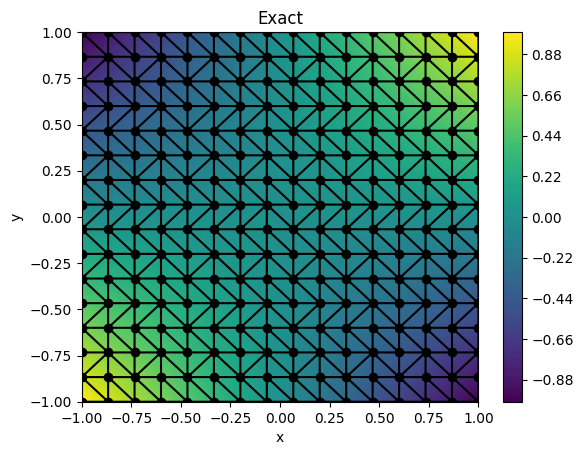

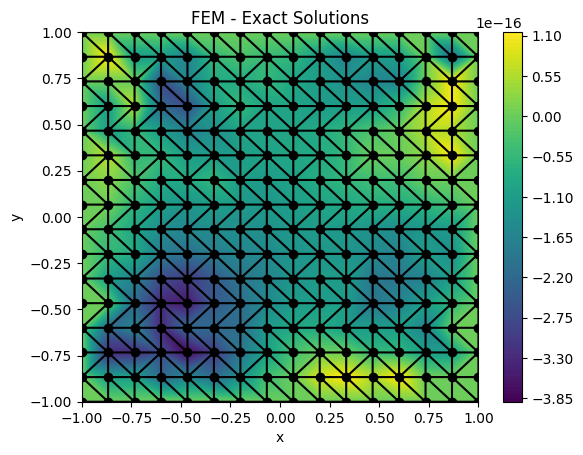

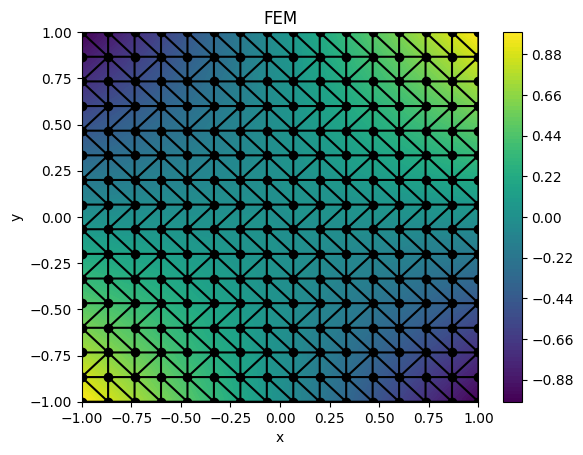

In [4]:
i = 2

x = p_2d[i].x
y = p_2d[i].y

u_exact = u(x,y)
u_sol = p_2d[i].u_sol
p_2d[i].plot_on_mesh(u_exact, title = "Exact")
p_2d[i].plot_on_mesh(u_sol - u_exact, title = "FEM - Exact Solutions")
p_2d[i].plot_sol_on_mesh(title = "FEM")